# Simulate Beta Distribution from Sample
Using Julia, fit a data sample to a Bernoulli distribution comprised of a number of trials (draws) of your choosing. The default number of trials is 10,000. In probability theory and statistics, the beta distribution is a family of continuous probability distributions defined on the interval [0, 1] parameterized by two positive shape parameters, denoted by α and β, that appear as exponents of the random variable and control the shape of the distribution

## 0. Import packages and define SimulateBetaDistributionFromSample function
Install (if necessary) and import the functions necessary to run the SimulateBetaDistributionFromSample function. Then define the function for later use. 

In [16]:
# using Pkg
# Pkg.add("DataFrames")
# Pkg.add("Distributions")
# Pkg.add("Plots")
# Pkg.add("PlotThemes")
# Pkg.add("KernelDensity")

using DataFrames
using Distributions
using Plots
using PlotThemes
using KernelDensity
gr()
theme(:bright)

function SimulateBetaDistributionFromSample(
    dataframe::DataFrame,
    column_name::String,
    trials::Integer=10000,
    show_plot::Bool=true
)
    # Get parameters for simulation
    Param_BetaDistSim = fit(Beta, dataframe[:, column_name])
    println("Alpha parameter (α) used in simulation: ", Param_BetaDistSim.α)
    println("Beta parameter (β) used in simulation: ", Param_BetaDistSim.β)
    # Conduct simulation
    Arr_BetaDistSim = rand(Param_BetaDistSim, trials, 1)
    DF_BetaDistSim = DataFrame(Arr_BetaDistSim, :auto)
    DF_BetaDistSim[:, "x1"] = round.(DF_BetaDistSim[:, "x1"], digits= 2)
    # Get kernel density estimates for sample and simulation
    kde_sample = kde(dataframe[:, column_name])
    kde_simulation = kde(DF_BetaDistSim[:, "x1"])
    # Generate plot if requested by user
    if show_plot
        title_for_plot = "Simulated Outcomes (Beta Distribution)"
        p = histogram(
            DF_BetaDistSim[:, "x1"], 
            bins=20, 
            fillalpha= 0.4, 
            label= "Simulated Outcomes", 
            title=title_for_plot, 
            xlabel=column_name
        )
        plot!(
            kde_simulation.x, 
            kde_simulation.density .* length(DF_BetaDistSim[:, "x1"]) .* 0.05, 
            linewidth= 3, 
            color= 1, 
            label= "Density of Simulation"
        )
        plot!(
            kde_sample.x, 
            kde_sample.density .* length(DF_BetaDistSim[:, "x1"]) .* 0.05, 
            alpha= 0.6, 
            linewidth= 3, 
            color= 2, 
            label= "Density of Sample"
        )
        display(p)
    end
    # Return simulation results
    return DF_BetaDistSim
end

SimulateBetaDistributionFromSample (generic function with 3 methods)

## 1. Import your data sample
First, import your data sample into Julia. This example uses a randomly generated dataset.

In [11]:
Arr_RandomNumbers = rand(50, 1)
DF_RandomNumbers = DataFrame(Arr_RandomNumbers, :auto)

50-element Vector{Float64}:
 0.54
 0.41
 0.72
 0.54
 0.81
 0.85
 0.47
 0.11
 0.18
 0.88
 0.75
 0.39
 0.55
 ⋮
 0.44
 0.09
 0.57
 0.87
 0.95
 0.52
 0.28
 0.99
 0.77
 0.05
 0.51
 0.24

## 2. Use the SimulateBetaDistributionFromSample function
Use the SimulateBetaDistributionFromSample function to simulate a Normal distribution from your sample dataset.

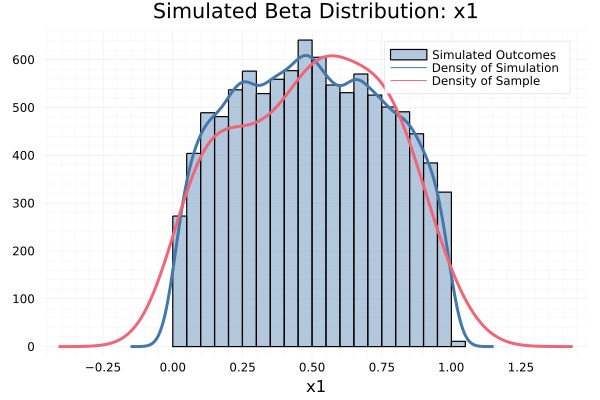

Alpha parameter (α) used in simulation: 1.2263044310437388
Beta parameter (β) used in simulation: 1.252963329653166


,x1
,Float64
1,0.24
2,0.3
3,0.46
4,0.74
5,0.77
6,0.57
7,0.34
8,0.94
9,0.29


In [17]:
DF_Sim = SimulateBetaDistributionFromSample(DF_RandomNumbers, "x1")